__Load libraries__

In [1]:
import requests
import json
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import pprint
import pickle
from IPython.display import display

In [2]:
### warnings
import warnings
warnings.filterwarnings("ignore")

<p>OpenAlex is a free and open catalog of the world's scholarly papers, researchers, journals, and institutions — along with all the ways they're connected to one another.</p>

Two most important data sources are __MAG__ and __Crossref__. Other key sources include:<br>

<ul>
<li>ORCID</li>
<li>ROR</li>
<li>DOAJ</li>
<li>Unpaywall</li>
<li>Pubmed</li>
<li>Pubmed Central</li>
<li>The ISSN International Centre</li>
<li>Subject-area and institutional repositories from arXiv to Zenodo and everywhere in between.</li>
</ul>
ROR
DOAJ
Unpaywall
Pubmed
Pubmed Central
The ISSN International Centre
Subject-area and institutional repositories from arXiv to Zenodo and everywhere in between.

The OpenAlex dataset describes scholarly entities and how those entities are connected to each other.<br>There are 6 types of entities:<br> <ul> <li> __works__  (like papers and datasets) are products of research.</li><li> __authors__ create works. </li> <li> __Sources__ (like journals and repositories) host works. </li> <li> __institutions__ (like universities) are affiliated with works. </li> <li> __Publishers__ organizations that distribute works.  </li><li> __concepts__ describe the topics of works.</li></ul>

<!-- ![](openAlex_entity.png) -->

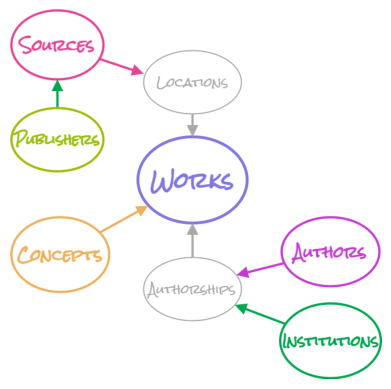

In [3]:
from matplotlib import image as mpimg
image=mpimg.imread("openAlex_entity.png")
plt.imshow(image)
plt.axis('off')
plt.show()

__Institutions in OpenAlex are closely linked with the ROR registry of research organizations.
By searching the ROR website, we can find the ROR ID for KTH.__

<!-- ![](ror-orcid-doi.png)  -->

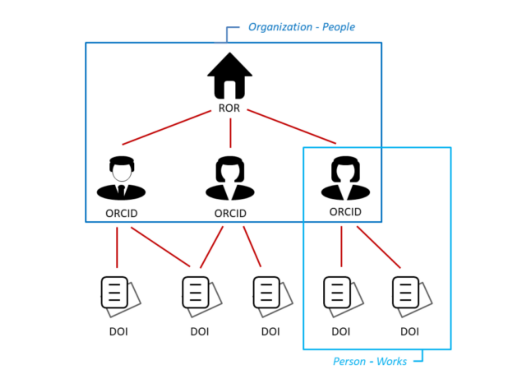

In [4]:
image=mpimg.imread("ror-orcid-doi.png")
plt.imshow(image)
plt.axis('off')
plt.show()

In [5]:
# specify endpoint
kth_ror="https://ror.org/026vcq606"  ## KTH ROR
endpoint = 'works'

# build the 'filter' parameter
# We'll limit it to the last 20 years
filters = ",".join((
    f'institutions.ror:{kth_ror}',
    'from_publication_date:2003-01-01',
))

# put the URL together
filtered_works_url = f'https://api.openalex.org/{endpoint}?filter={filters}'

print(f'complete URL with filters:\n{filtered_works_url}')

## requset
r = requests.get(filtered_works_url)
results_page = r.json()
print(f"retrieved {len(results_page['results'])} works")
print()
print("Total Works:",results_page['meta']['count'])

complete URL with filters:
https://api.openalex.org/works?filter=institutions.ror:https://ror.org/026vcq606,from_publication_date:2003-01-01
retrieved 25 works

Total Works: 62907


In [ ]:
# url = f'{filtered_works_url}&select={select}&cursor={cursor}'
# #     page_with_results = requests.get(url).json()

###### Get the full publications data KTH in openAlex
__To get the data for the KTH, we need to collect all of the works from OpenAlex which have at least one author from KTH.__

OBS! RUN ONLY FOR FIRST TIME AND SAVE FILE, I am going to use saved file.

In [ ]:
# there are 25 results per page
print("Total API calls for all data: ",results_page['meta']['count'] / 25)

In [ ]:
!pwd

In [ ]:
## uncomment for first time
# loop through pages
# works = []
# loop_index = 0
# cursor = '*'
# url = f'{filtered_works_url}&cursor={cursor}'
# page_with_results = requests.get(url).json()
# results = page_with_results['results']
# works.extend(results)



# while cursor:
    
#     # set cursor value and request page from OpenAlex
#     url = f'{filtered_works_url}&cursor={cursor}'
#     page_with_results = requests.get(url).json()
    
#     results = page_with_results['results']
#     works.extend(results)

#     # update cursor to meta.next_cursor
#     cursor = page_with_results['meta']['next_cursor']
#     loop_index += 1
#     if loop_index in [5, 10, 20, 50, 100] or loop_index % 500 == 0:
#         print(f'{loop_index} api requests made so far')
# print(f'done. made {loop_index} api requests. collected {len(works)} works')

In [ ]:
## saving data in pickle for first  time
# import pickle
# import os

# with open('data/kth_works_openalex_2003_2023.pickle', 'wb') as outf:
#     pickle.dump(works, outf, protocol=pickle.HIGHEST_PROTOCOL)


###### Loading data
kth_works_openalex_2003_2023.pickle is 528 Mb

In [6]:
# Uncomment these lines and run to load the saved results

## Use Pandas to organize the data

with open('data/kth_works_openalex_2003_2023.pickle', 'rb') as f:
    work_total = pickle.load(f)
works=pd.DataFrame(work_total)

diva= pd.read_csv('export.csv')

In [7]:
len(works)

59501

In [8]:
pd.DataFrame({'Null_count':works.isna().sum(),'%_of_null_values':(works.isnull().sum()/len(works))*100})

,Null_count,%_of_null_values
id,0,0.000000
doi,5546,9.320852
title,61,0.102519
display_name,61,0.102519
publication_year,0,0.000000
publication_date,0,0.000000
ids,0,0.000000
language,12,0.020168
primary_location,0,0.000000
type,0,0.000000


In [ ]:
# works.info()

In [9]:
data=[]
print("Total records:",len(works))
print(work_total[89].keys())
for work in work_total:
    data.append(
        {
        "work_id":work["id"],
        "Title":work["title"], 
        "PublicationType":work["type"],
        "work oa":work["open_access"]["oa_status"],
        "works dispaly name":work["display_name"],
        "Year":work["publication_year"],
        "cited_by_count":work["cited_by_count"],
        "counts_by_year":work["counts_by_year"],
        
        ### ids
        "openalex":work["ids"]["openalex"] if "openalex" in work["ids"] else None,
        "DOI":work["ids"]["doi"] if "doi" in work["ids"] else None,
        "mag":work["ids"]["mag"] if "mag" in  work["ids"] else None,
        "pmid":work["ids"]["pmid"] if "pmid" in work["ids"] else None,
        "pmcid":work["ids"]["pmcid"] if "pmcid" in work["ids"] else None,
         
        ###
    
        "source":work["primary_location"]["source"]["display_name"]if (work["primary_location"] and work["primary_location"]["source"]) else None,
        "journal":work["primary_location"]["source"]["host_organization_name"] if (work["primary_location"] and work["primary_location"]["source"]) else None,
        "issn":work["primary_location"]["source"]["issn"] if (work["primary_location"] and work["primary_location"]["source"]) else None,
        "corresponding_author_ids":work["corresponding_author_ids"],
        "corresponding_institution_ids":work["corresponding_institution_ids"],
        "apc_payment":work["apc_payment"],
        "biblio":work["biblio"]
            
        }
    )
df = pd.DataFrame(data)
df.head()
# df.to_csv(r'data/kth_openAlex_2003_2023.csv', index=False)

Total records: 59501
dict_keys(['id', 'doi', 'title', 'display_name', 'publication_year', 'publication_date', 'ids', 'language', 'primary_location', 'type', 'open_access', 'authorships', 'corresponding_author_ids', 'corresponding_institution_ids', 'apc_payment', 'cited_by_count', 'biblio', 'is_retracted', 'is_paratext', 'concepts', 'mesh', 'locations_count', 'locations', 'best_oa_location', 'grants', 'referenced_works', 'related_works', 'ngrams_url', 'abstract_inverted_index', 'cited_by_api_url', 'counts_by_year', 'updated_date', 'created_date'])


,work_id,Title,PublicationType,work oa,works dispaly name,Year,cited_by_count,counts_by_year,openalex,DOI,mag,pmid,pmcid,source,journal,issn,corresponding_author_ids,corresponding_institution_ids,apc_payment,biblio
0,https://openalex.org/W1031578623,GROMACS: High performance molecular simulation...,journal-article,gold,GROMACS: High performance molecular simulation...,2015,11179,"[{'year': 2023, 'cited_by_count': 970}, {'year...",https://openalex.org/W1031578623,https://doi.org/10.1016/j.softx.2015.06.001,1031578623,None,None,SoftwareX,Elsevier BV,[2352-7110],[https://openalex.org/A4352596074],"[https://openalex.org/I2800139495, https://ope...","{'price': 448, 'currency': 'EUR', 'provenance'...","{'volume': '1-2', 'issue': None, 'first_page':..."
1,https://openalex.org/W2012034410,Tissue-based map of the human proteome,journal-article,closed,Tissue-based map of the human proteome,2015,9023,"[{'year': 2023, 'cited_by_count': 582}, {'year...",https://openalex.org/W2012034410,https://doi.org/10.1126/science.1260419,2012034410,https://pubmed.ncbi.nlm.nih.gov/25613900,None,Science,American Association for the Advancement of Sc...,"[0036-8075, 1095-9203]",[https://openalex.org/A4358309292],"[https://openalex.org/I86987016, https://opena...",None,"{'volume': '347', 'issue': '6220', 'first_page..."
2,https://openalex.org/W2096885696,A safe operating space for humanity,journal-article,bronze,A safe operating space for humanity,2009,7835,"[{'year': 2023, 'cited_by_count': 246}, {'year...",https://openalex.org/W2096885696,https://doi.org/10.1038/461472a,2096885696,https://pubmed.ncbi.nlm.nih.gov/19779433,None,Nature,Nature Portfolio,"[1476-4687, 0028-0836]",[],[],None,"{'volume': '461', 'issue': '7263', 'first_page..."
3,https://openalex.org/W2116327492,Dye-Sensitized Solar Cells,journal-article,closed,Dye-Sensitized Solar Cells,2010,7777,"[{'year': 2023, 'cited_by_count': 106}, {'year...",https://openalex.org/W2116327492,https://doi.org/10.1021/cr900356p,2116327492,https://pubmed.ncbi.nlm.nih.gov/20831177,None,Chemical Reviews,American Chemical Society,"[1520-6890, 0009-2665]",[],[],None,"{'volume': '110', 'issue': '11', 'first_page':..."
4,https://openalex.org/W1999167944,Planetary boundaries: Guiding human developmen...,journal-article,green,Planetary boundaries: Guiding human developmen...,2015,6086,"[{'year': 2023, 'cited_by_count': 338}, {'year...",https://openalex.org/W1999167944,https://doi.org/10.1126/science.1259855,1999167944,https://pubmed.ncbi.nlm.nih.gov/25592418,None,Science,American Association for the Advancement of Sc...,"[0036-8075, 1095-9203]",[],[],None,"{'volume': '347', 'issue': '6223', 'first_page..."


In [10]:
print("Null values for new dataframe that created.")
pd.DataFrame({'Null_count':df.isna().sum(),'%_of_null_values':(df.isnull().sum()/len(df))*100})  ## .isna() is same .isnull()

Null values for new dataframe that created.


,Null_count,%_of_null_values
work_id,0,0.000000
Title,61,0.102519
PublicationType,0,0.000000
work oa,0,0.000000
works dispaly name,61,0.102519
Year,0,0.000000
cited_by_count,0,0.000000
counts_by_year,0,0.000000
openalex,0,0.000000
DOI,5546,9.320852


In [11]:
df["DOI"]=df["DOI"].apply(lambda doi: str(doi).replace("https://doi.org/",""))
pd.DataFrame({'Null_count':df.isna().sum(),'%_of_null_values':(df.isna().sum()/len(df))*100})  ## .isna() is same .isnull()

,Null_count,%_of_null_values
work_id,0,0.000000
Title,61,0.102519
PublicationType,0,0.000000
work oa,0,0.000000
works dispaly name,61,0.102519
Year,0,0.000000
cited_by_count,0,0.000000
counts_by_year,0,0.000000
openalex,0,0.000000
DOI,0,0.000000


In [ ]:
# class display(object):
#     """Display HTML representation of multiple objects"""
#     template = """<div style="float: left; padding: 10px;">
#     <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
#     </div>"""
#     def __init__(self, *args):
#         self.args = args
        
#     def _repr_html_(self):
#         return '\n'.join(self.template.format(a, eval(a)._repr_html_())
#                          for a in self.args)
    
#     def __repr__(self):
#         return '\n\n'.join(a + '\n' + repr(eval(a))
#                            for a in self.args)

In [ ]:
diva.keys()

###### DOI compartition

In [12]:

openAlex=df[["DOI","Year","PublicationType"]]
openAlex=openAlex[openAlex["Year"]>2010]

diva=diva[["DOI","Year","PublicationType"]]
diva["DOI"]=diva["DOI"].dropna()
diva["DOI"]=diva["DOI"].apply(lambda DOI: str(DOI).lower())


# print(pd.DataFrame({'total number of DOI in openalex':openAlex_dois.count(),'Total number of DOI in Diva-KTH':diva_dois.count()}))
print(pd.DataFrame([len(openAlex),len(diva)],index=["openalex","diva-KTH"]))





data12=pd.merge(openAlex,diva,on="DOI",indicator = True,how = "inner")
# data12=pd.merge(openAlex,diva,on="DOI",indicator = True,how = "left")


# data12=data12.loc[lambda x : x['_merge']=="left_only"]
DOIs=[]
for doi in set(openAlex["DOI"] ):
    if doi not in set(data12["DOI"]):
        DOIs.append(doi)
len(DOIs)

              0
openalex  45275
diva-KTH  69841


6050

In [31]:
openAlex
data12

,DOI,Year_x,PublicationType_x,Year_y,PublicationType_y,_merge
0,10.1016/j.softx.2015.06.001,2015,journal-article,2015,Artikel i tidskrift,both
1,10.1016/j.softx.2015.06.001,2015,journal-article,2015,Artikel i tidskrift,both
2,10.1126/science.1260419,2015,journal-article,2015,Artikel i tidskrift,both
3,10.1126/science.1260419,2015,journal-article,2015,Artikel i tidskrift,both
4,10.1126/science.1259855,2015,journal-article,2015,Artikel i tidskrift,both
...,...,...,...,...,...,...
35310,10.1007/978-3-642-20530-9_5,2011,book-chapter,2011,"Kapitel i bok, del av antologi",both
35311,10.1109/bdcloud.2014.4,2014,proceedings-article,2015,Konferensbidrag,both
35312,10.1007/978-3-319-06317-1_9,2015,book-chapter,2015,Konferensbidrag,both
35313,10.1007/978-1-4614-4103-8_3,2012,book-chapter,2012,"Kapitel i bok, del av antologi",both


In [13]:
"10.1109/tcns.2022.3181553" in set(diva["DOI"])

False

In [14]:
# DOIs[1090:1120]

In [19]:
doi=DOIs[0][10]
doi="10.1093/imrn/rnac003"

## doi.org
doi_url="https://www.doi.org/"
r1= requests.get(doi_url+doi)
# if req=="200":
#     print(doi,"ok",req.url)
if r1.status_code==200:
    print("ok")
else:
    print(r1.status_code," Website's https://www.doi.org/ can't find the doi.")
    

    
    
# # ## diva-kth    
    
# # diva_url="https://kth.diva-portal.org/smash/resultList.jsf?&language=en&searchType=SIMPLE&query="
# # # https://kth.diva-portal.org/smash/resultList.jsf?dswid=6484&searchType=SIMPLE&query=

# # r2= requests.get(diva_url+doi)
# # # if req=="200":
# # #     print(doi,"ok",req.url)
# # if r2.status_code==200:
    print("ok")
# # else:
# #     print(r2.status_code," Website's https://kth.diva-portal.org/ can't find the doi.")
# # r2.text

403  Website's https://www.doi.org/ can't find the doi.
ok


###### Visualize the data
Filter by year and open access

work oa
bronze     184
closed    1751
gold       598
green      913
hybrid     567
Name: PublicationType, dtype: int64

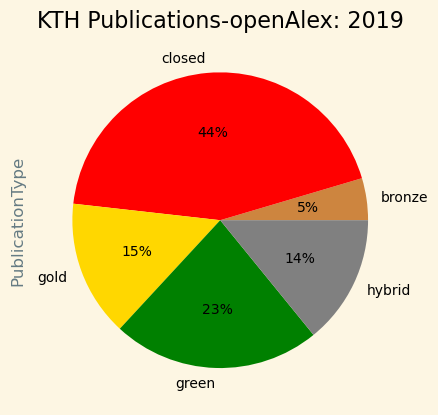

In [20]:
# Count open access by year

plt.style.use('Solarize_Light2')
year=2019
data=df[df["Year"]==year].groupby("work oa")["PublicationType"].count()

colors={
    "bronze":"peru",
    "closed":"red",
    "gold":"gold",
    "green":"green",     
     "hybrid":"grey"
}

df[df["Year"]==year].groupby("work oa")["PublicationType"].count().plot.pie(
    labels = data.index,
    autopct='%.0f%%',
    colors=[colors[index] for index in data.index],
    title="KTH Publications-openAlex: "+f"{year}",
    legend=False
)


display(data)

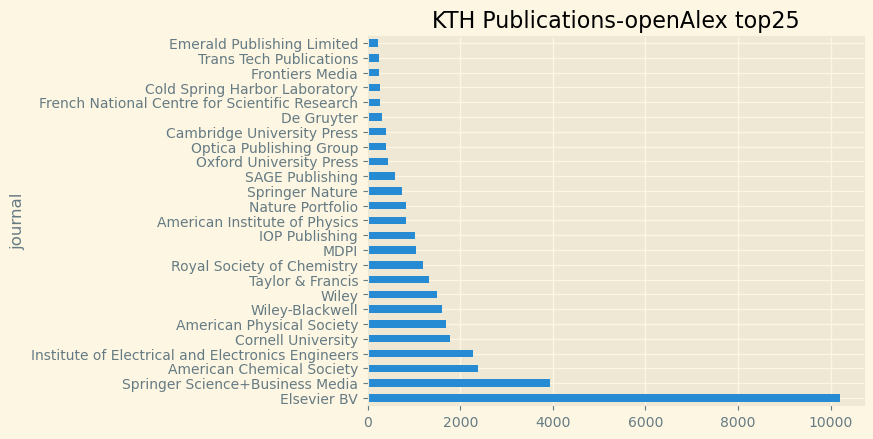

In [21]:
df[["journal","Year"]].groupby("journal").count().sort_values(by=["Year"],ascending=False)[0:25].plot.barh(
    title="KTH Publications-openAlex top25",
    legend=False
)
plt.show()
journal25=df[["journal","Year"]].groupby("journal").count().sort_values(by=["Year"],ascending=False)[0:25]
# journal.index

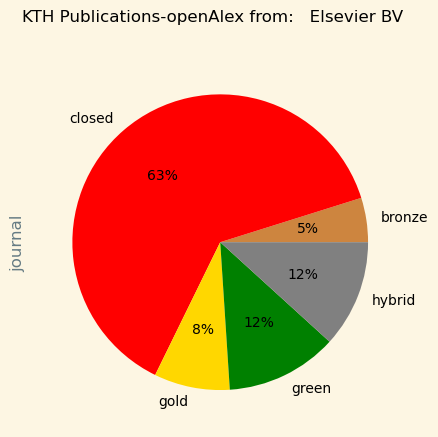

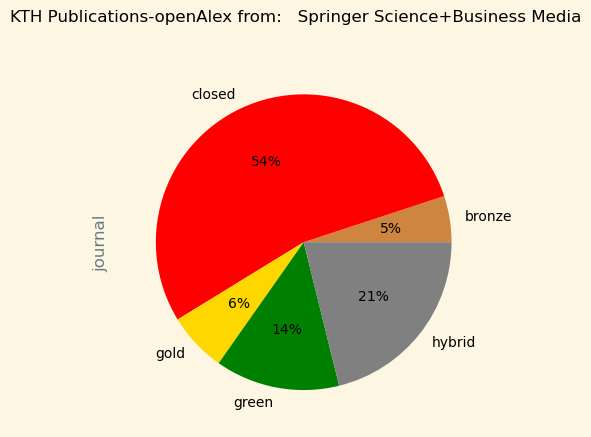

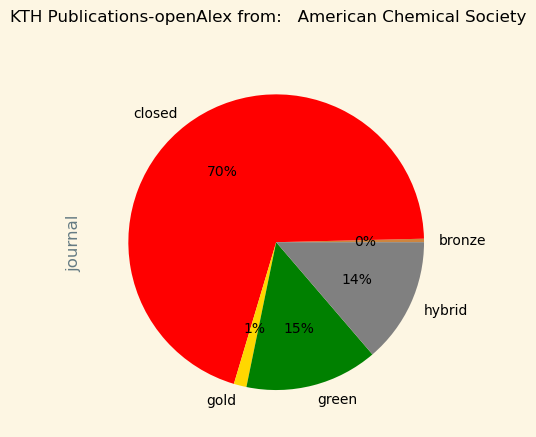

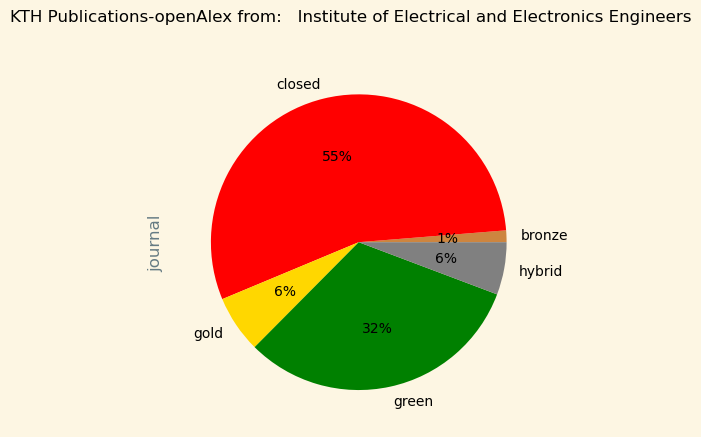

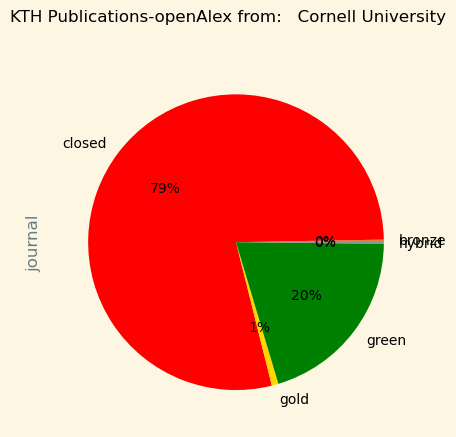

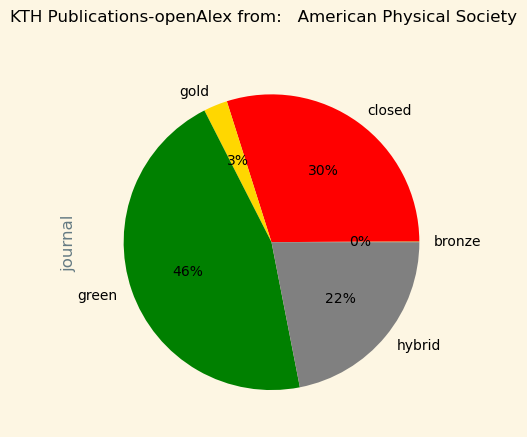

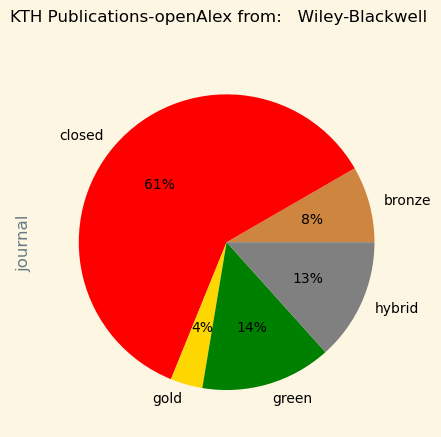

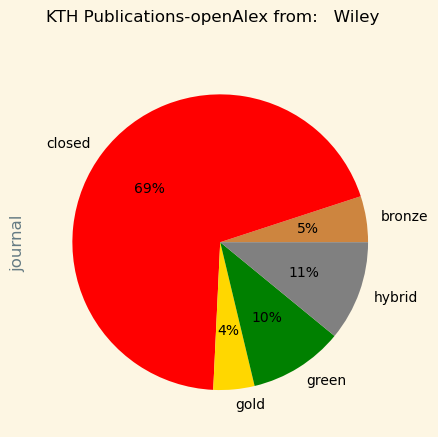

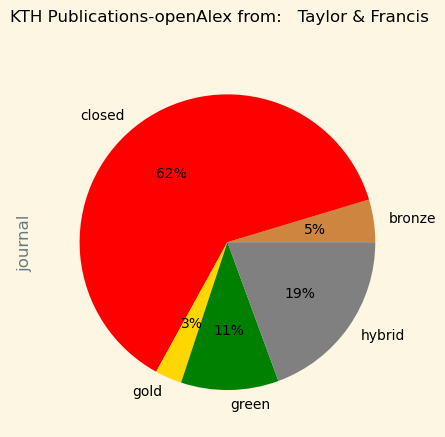

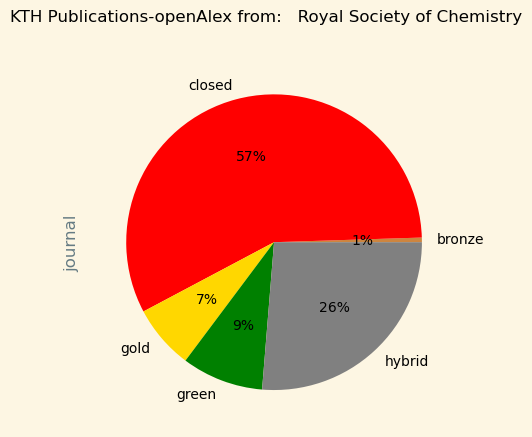

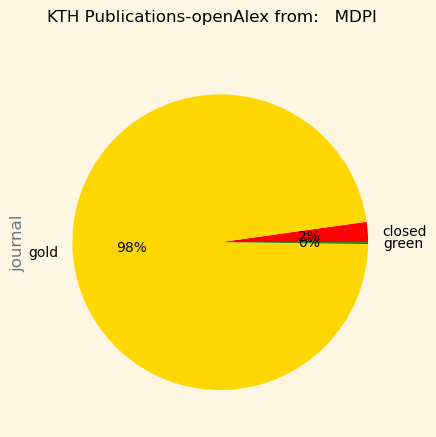

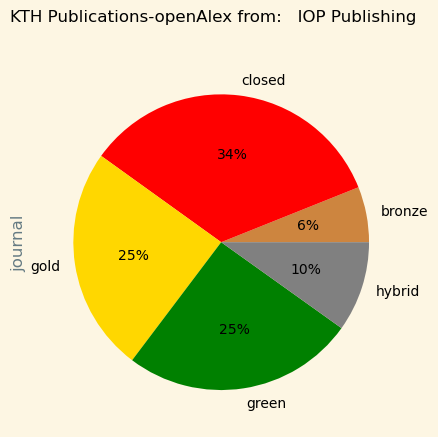

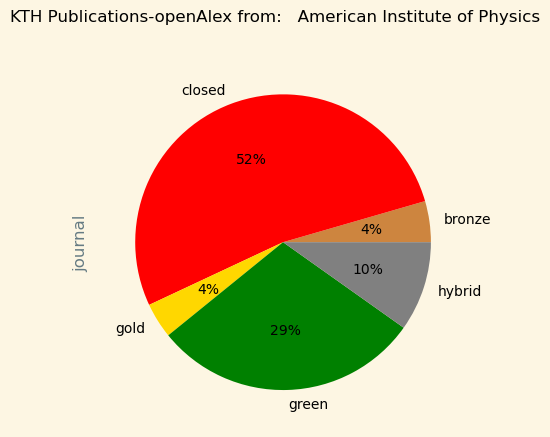

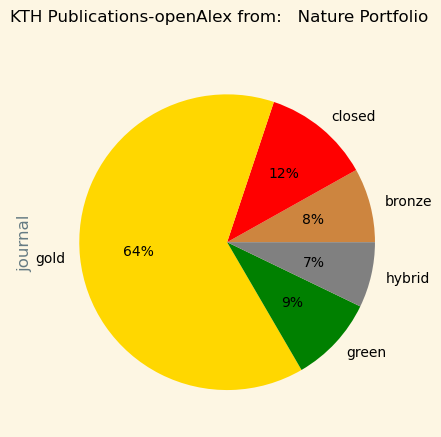

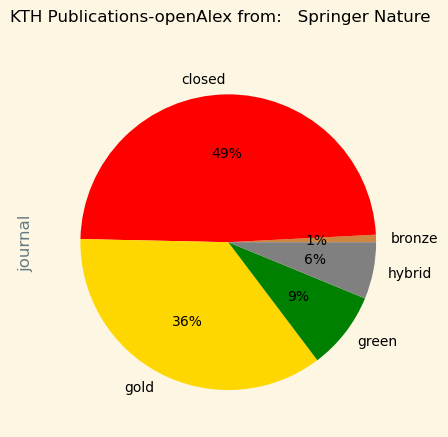

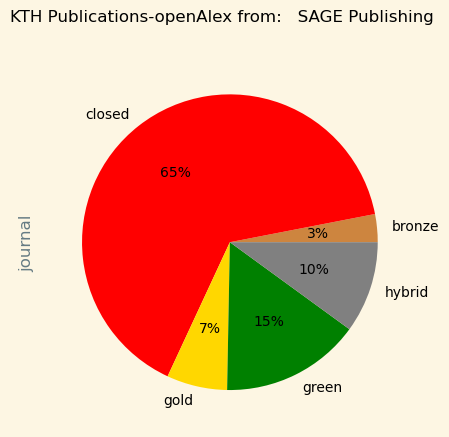

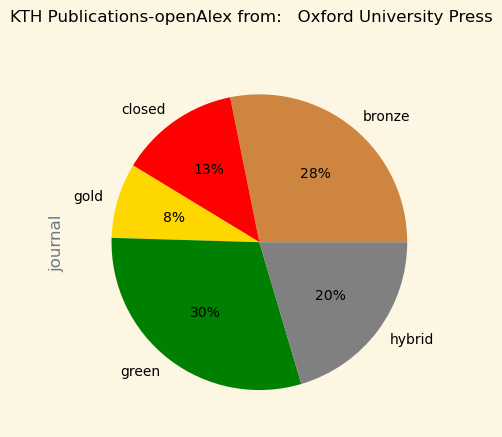

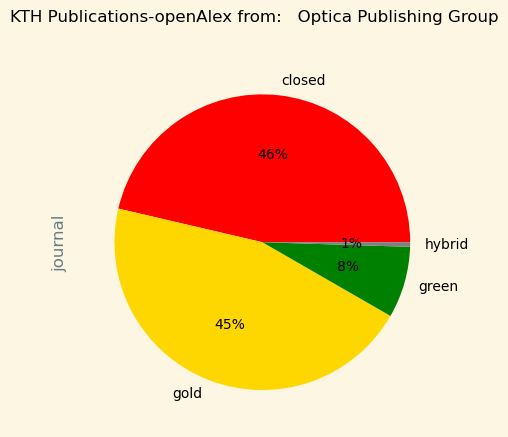

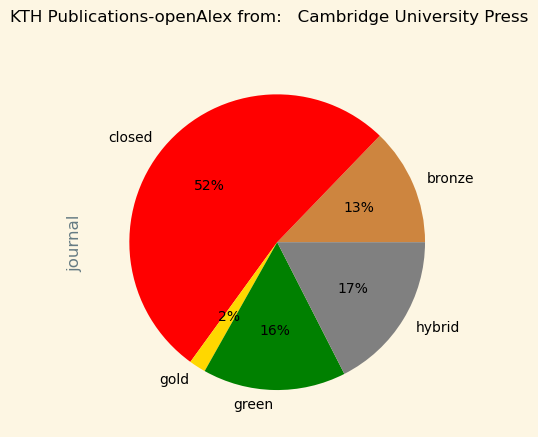

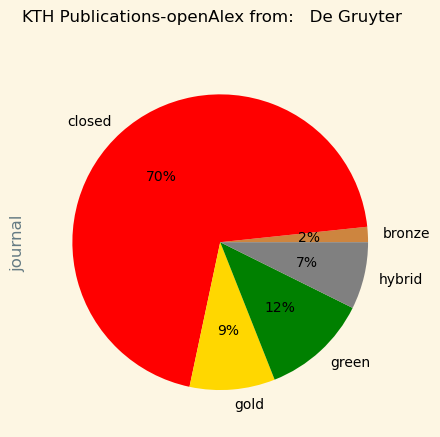

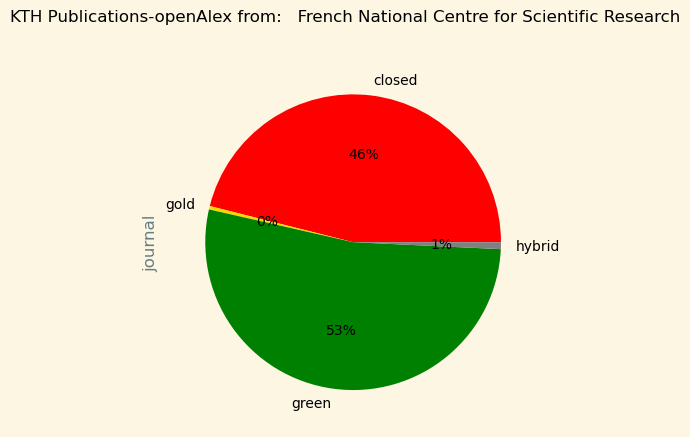

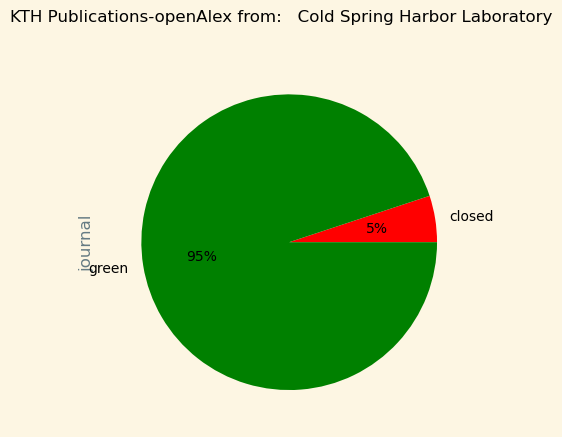

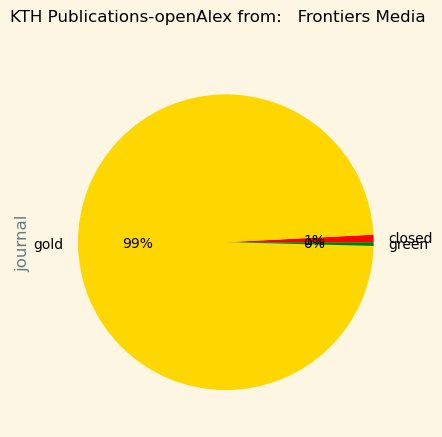

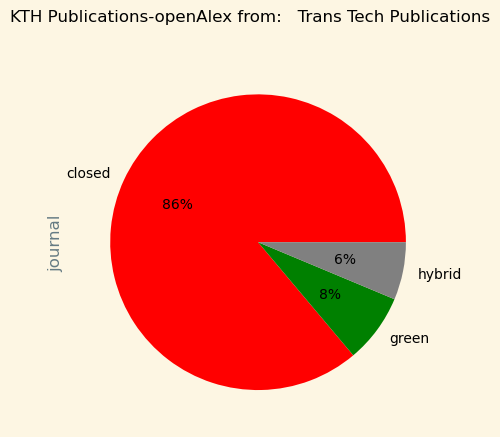

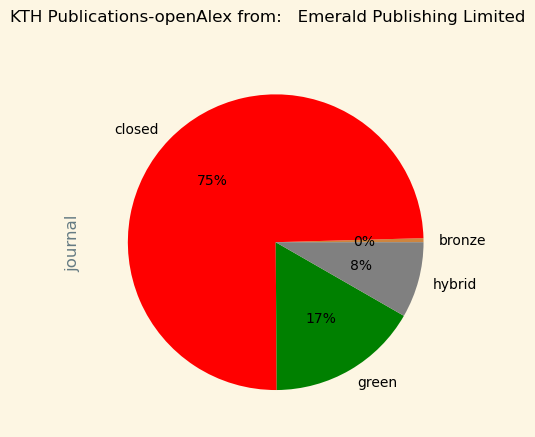

In [22]:


for journal in journal25.index:
    data=df[df["journal"]==journal][["work oa","journal"]].groupby(by=["work oa"]).count()#["work oa"].groupby(by=["work oa"])
    data
    colors={
        "bronze":"peru",
        "closed":"red",
        "gold":"gold",
        "green":"green",     
         "hybrid":"grey"
    }
    data.plot.pie(
        labels = data.index,
        autopct='%.0f%%',
        colors=[colors[index] for index in data.index],
        title="KTH Publications-openAlex from:   "+f"{journal}",
        legend=False,
        subplots=True
    )
    plt.show()

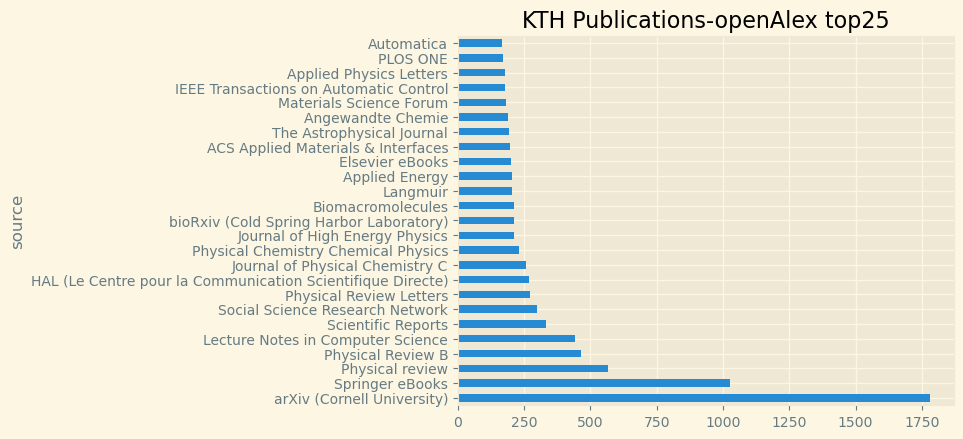

In [16]:
df[["source","Year"]].groupby("source").count().sort_values(by=["Year"],ascending=False)[0:25].plot.barh(
    title="KTH Publications-openAlex top25",
    legend=False
)
plt.show()

publisher25=df[["source","Year"]].groupby("source").count().sort_values(by=["Year"],ascending=False)[0:25]

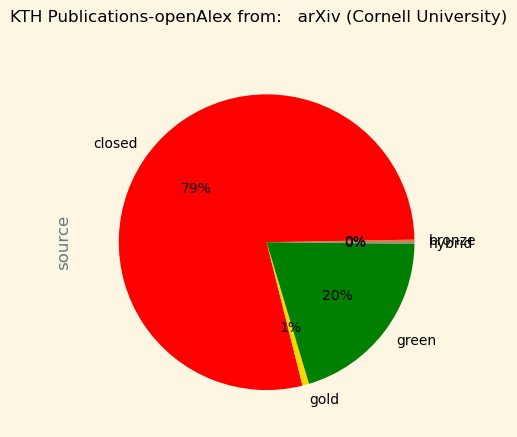

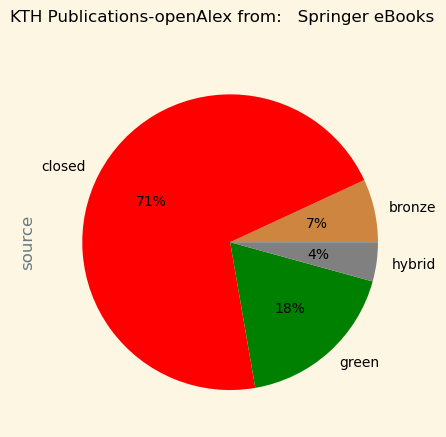

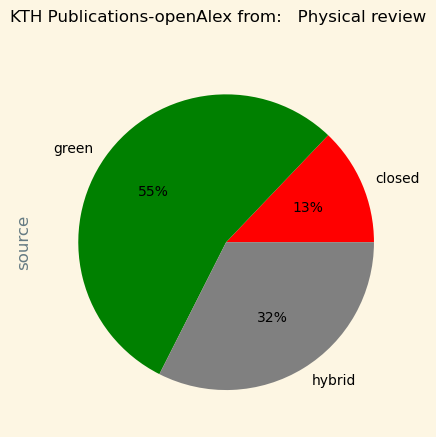

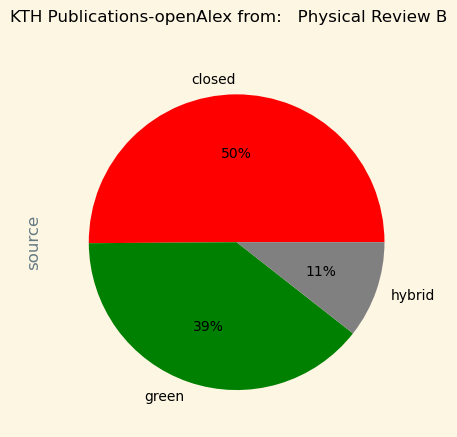

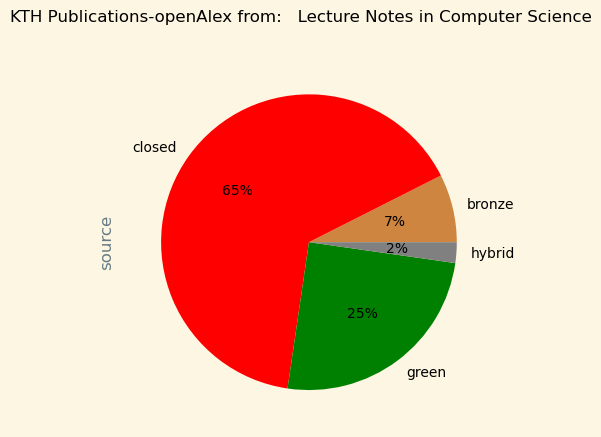

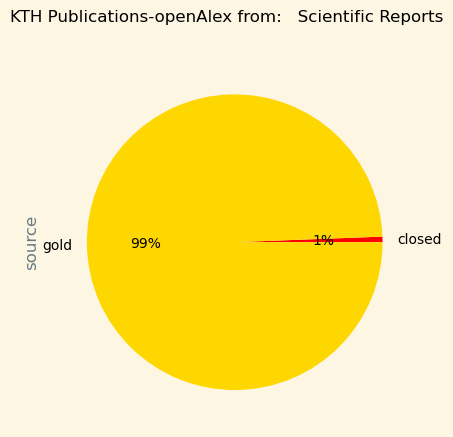

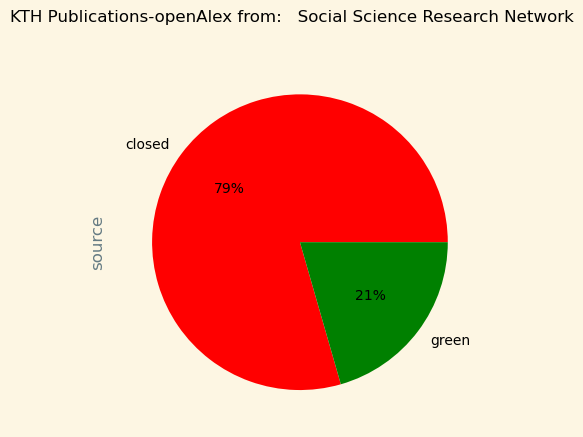

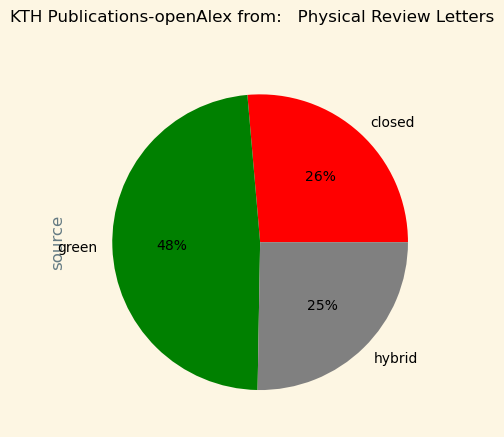

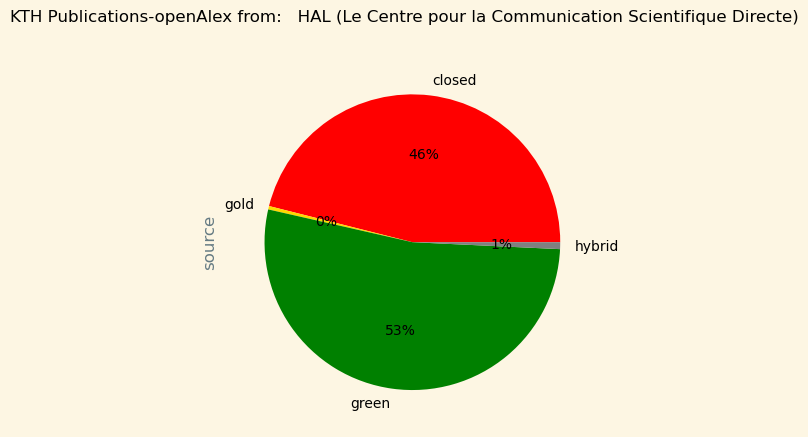

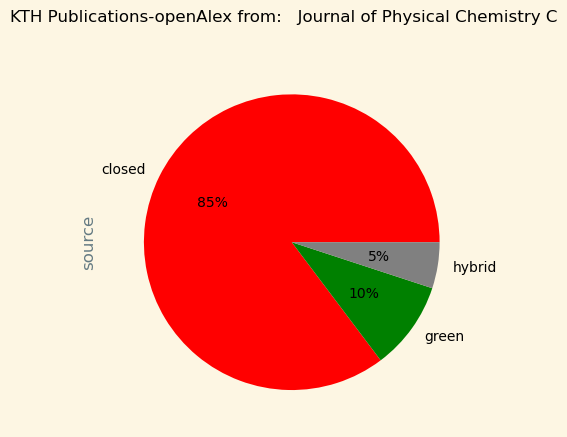

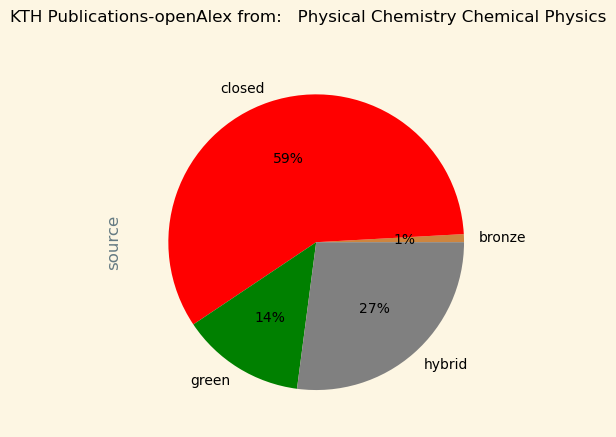

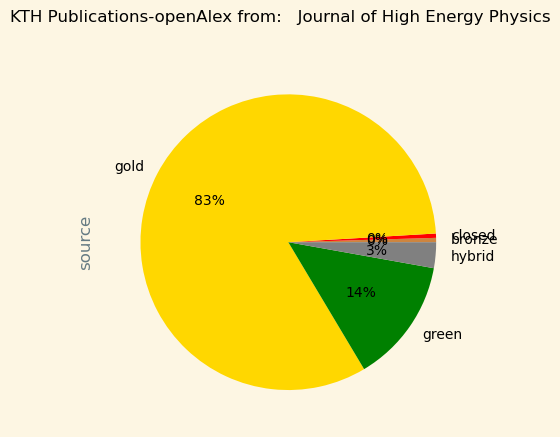

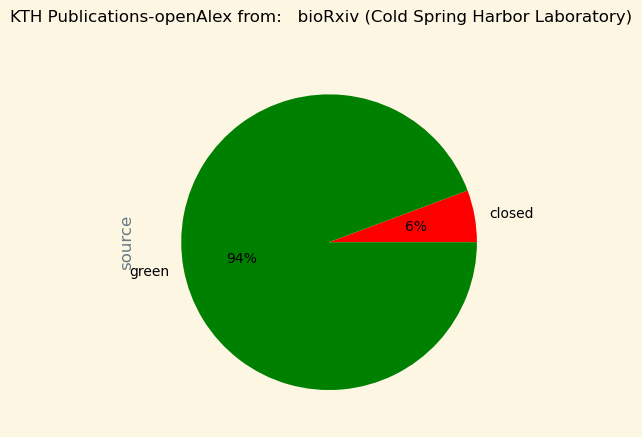

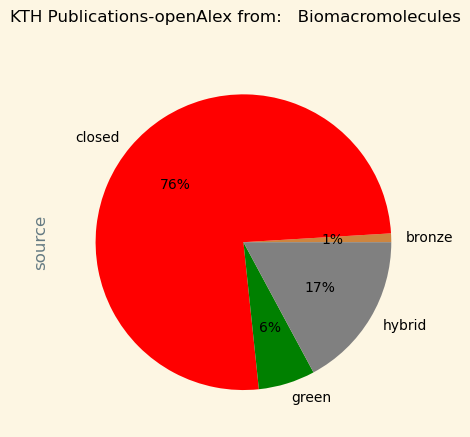

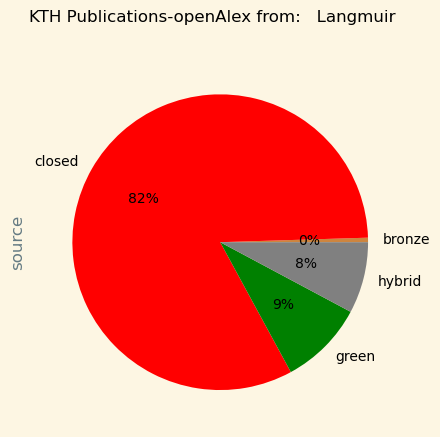

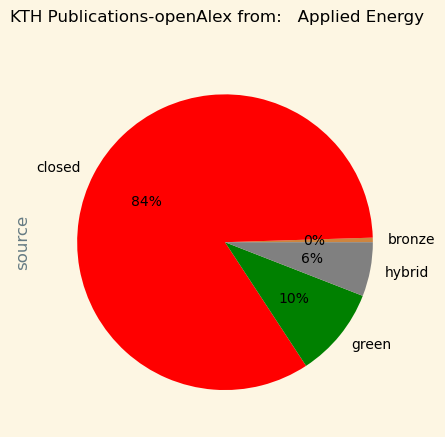

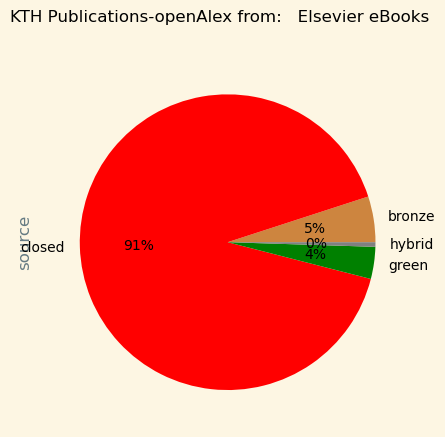

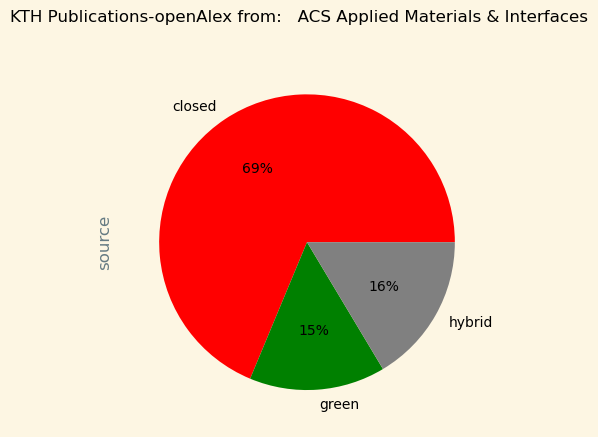

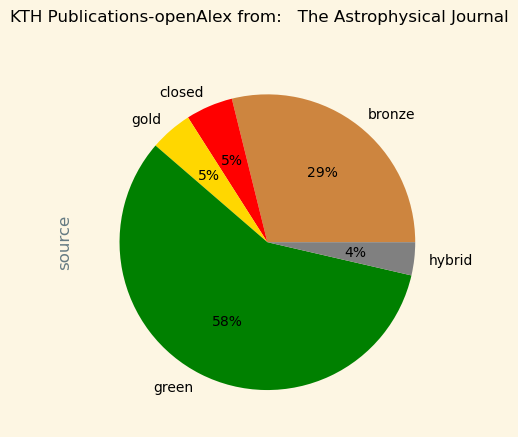

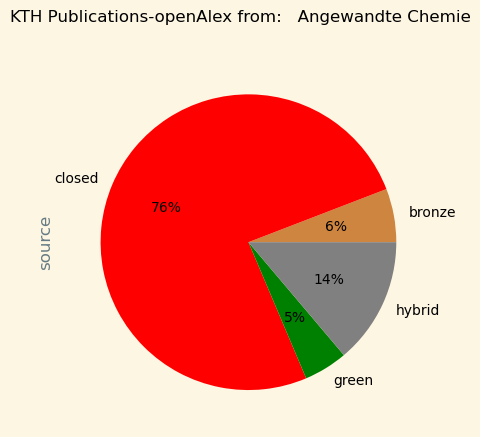

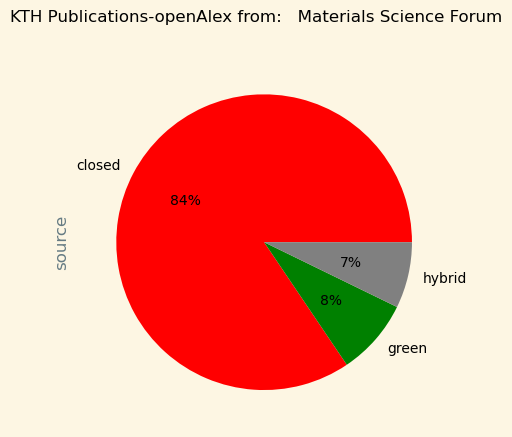

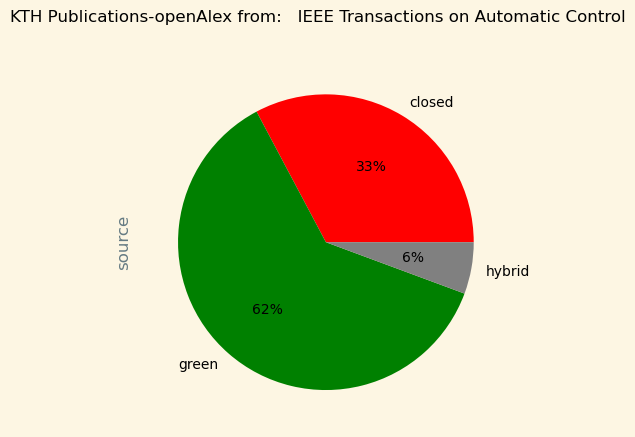

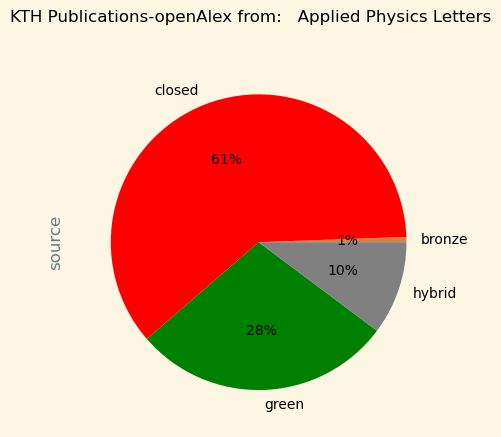

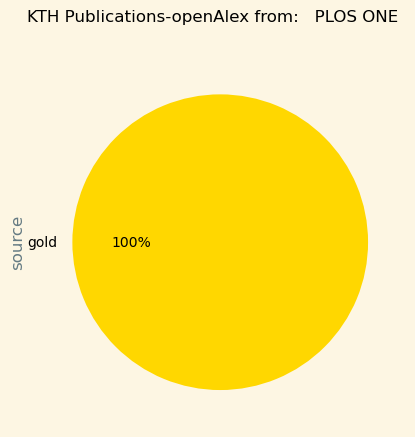

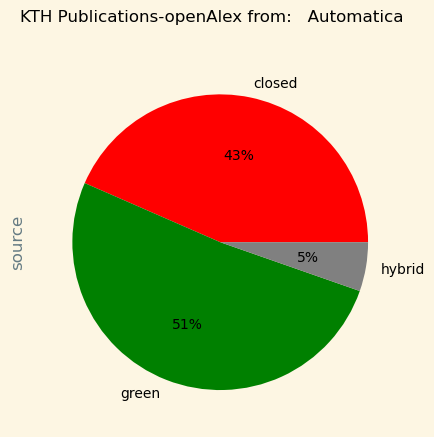

In [17]:
# publisher="Springer eBooks"
# publisher="Physical review"
for publisher in publisher25.index:
    data=df[df["source"]==publisher][["work oa","source"]].groupby(by=["work oa"]).count()#["work oa"].groupby(by=["work oa"])
    data
    colors={
        "bronze":"peru",
        "closed":"red",
        "gold":"gold",
        "green":"green",     
         "hybrid":"grey"
    }
    data.plot.pie(
        labels = data.index,
        autopct='%.0f%%',
        colors=[colors[index] for index in data.index],
        title="KTH Publications-openAlex from:   "+f"{publisher}",
        legend=False,
        subplots=True
    )
    plt.show()


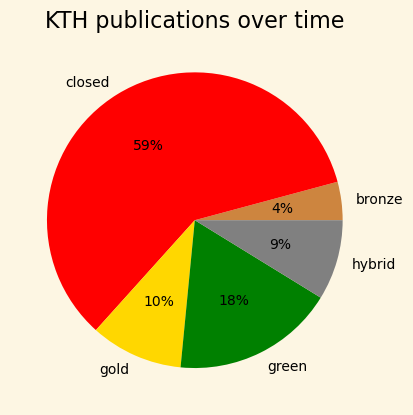

Total: 59501


work oa
bronze     2492
closed    35194
gold       6025
green     10567
hybrid     5223
Name: work oa, dtype: int64

In [19]:
colors={
    "bronze":"peru",
    "closed":"red",
    "gold":"gold",
    "green":"green",     
     "hybrid":"grey"
}


data=df.groupby(by=["work oa"])["work oa","PublicationType"].count()


data=data["work oa"]

##create pie chart
plt.pie(data,
        labels = data.index,
        autopct='%.0f%%',
        colors=[colors[index] for index in data.index]
       )
plt.title("KTH publications over time")
plt.show()
# data.index
# data
# display(kth_master.groupby(by=["work oa"]).size())
print("Total:",data.sum())
data

In [29]:
# data=pd.DataFrame(df["ids"])
# # [(i.keys(),i.values()) for i in data["ids"]]
# # for item in enumerate(work_total[90]["ids"].items()):
# #     print(item)

# [(name,ids) for name,ids in work_total[90]["ids"].items()]
#     # print(name,ids)
    
# # [{name:work} for name,ids in work_total[90]["ids"].items()]
# work_total[90]["ids"]["doi"]
# work_total[90]["ids"]

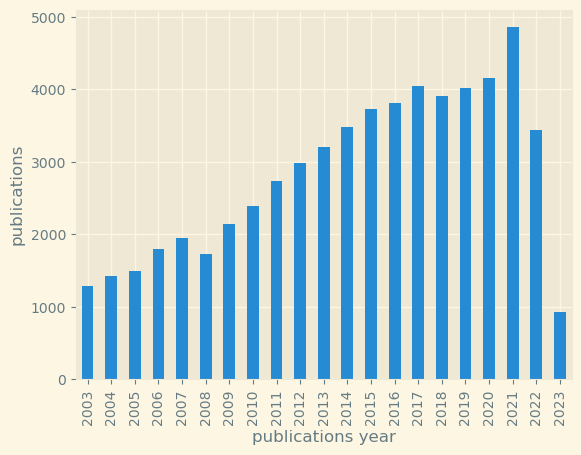

In [26]:

plt.style.use('Solarize_Light2')
df[["PublicationType","Year"]].groupby("Year").count().plot.bar(legend=False,xlabel="publications year",ylabel="publications")
plt.show()

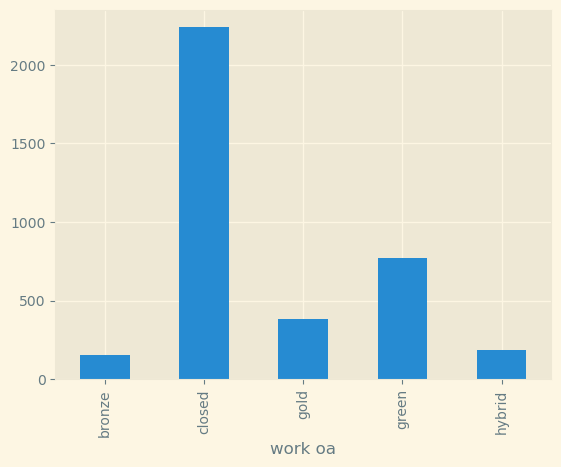

In [26]:
data=df[["PublicationType","work oa","journal","Year"]]#.groupby("publication_year").count()
data=data[data["Year"]==2015].groupby("work oa")["PublicationType"].count().plot.bar()


In [24]:
df[["PublicationType","Year"]].groupby("Year").count()

,PublicationType
Year,
2003,1289
2004,1430
2005,1494
2006,1800
2007,1946
2008,1732
2009,2146
2010,2389
2011,2736


In [ ]:
# works[180]

In [27]:
# data = []
# for work in works:
#     work_type=work["type"] if work["type"] else None
#     work_status=work["open_access"]["oa_status"] if work["open_access"]["oa_status"] else None
#     for authorship in work['authorships']:
#         if authorship:
#             author = authorship['author']
#             author_id = author['id'] if author else None
#             author_name = author['display_name'] if author else None
#             author_position = authorship['author_position']
#             data.append({
#                         "work_id": work['id'],
#                         "work_type":work_type,
#                         "work_status": work_status,
#                         'work_title': work['title'],
#                         'work_display_name': work['display_name'],
#                         'work_publication_year': work['publication_year'],
#                         'work_publication_date': work['publication_date'],
#                         'author_id': author_id,
#                         'author_name': author_name,
#                         'author_position': author_position,
#                         # 'institution_country_code': authorship['institutions']['country_code'],
#                     })
# df = pd.DataFrame(data)